In [ ]:


import _context
from Algorithms.Utils import moving_average




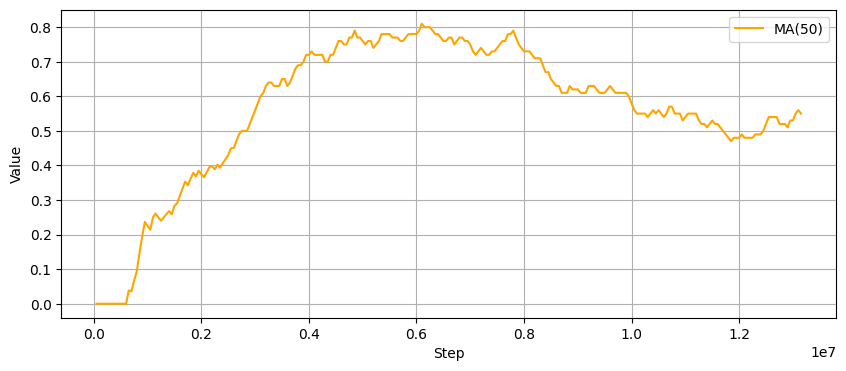

In [7]:
import _context
from Algorithms.Utils import moving_average
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

csv_path = Path('data') / 'IL_and_RL_分阶段_固定rule4-run-20260120-171606.csv'
df = pd.read_csv(csv_path)
df[['Step', 'Value']] = df[['Step', 'Value']].apply(pd.to_numeric, errors='coerce')
df = df.sort_values('Step').reset_index(drop=True)

# 平滑：优先使用 moving_average（如果在前面导入），否则用 pandas rolling
try:
    ma = moving_average(df['Value'].values, window=19)
    pad = np.full(len(df) - len(ma), np.nan)
    smooth = np.concatenate([pad, ma])
except Exception:
    smooth = df['Value'].rolling(window=50, min_periods=1).mean().values

plt.figure(figsize=(10,4))
# plt.plot(df['Step'], df['Value'], label='Value', alpha=0.5)
plt.plot(df['Step'], smooth, label='MA(50)', color='orange')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


## wall time 读法

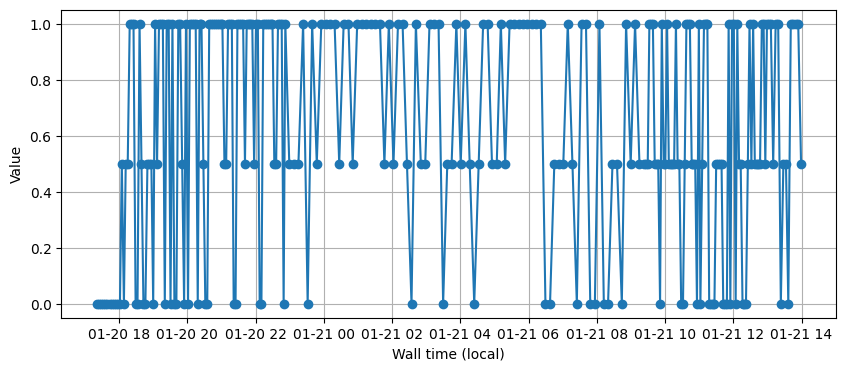

In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

csv_path = Path('data') / 'IL_and_RL_分阶段_固定rule4-run-20260120-171606.csv'
df = pd.read_csv(csv_path)

# 转换为 datetime（秒为单位），并设为 UTC，然后按需要转换到本地时区
df['wall_time_dt'] = pd.to_datetime(df['Wall time'], unit='s', utc=True).dt.tz_convert('Asia/Shanghai')

# 可选：格式化为字符串
df['wall_time_str'] = df['wall_time_dt'].dt.strftime('%Y-%m-%d %H:%M:%S')

# 绘图：以时间为 x 轴
plt.figure(figsize=(10,4))
plt.plot(df['wall_time_dt'], df['Value'], marker='o', linestyle='-')
plt.xlabel('Wall time (local)')
plt.ylabel('Value')
plt.grid(True)
plt.show()

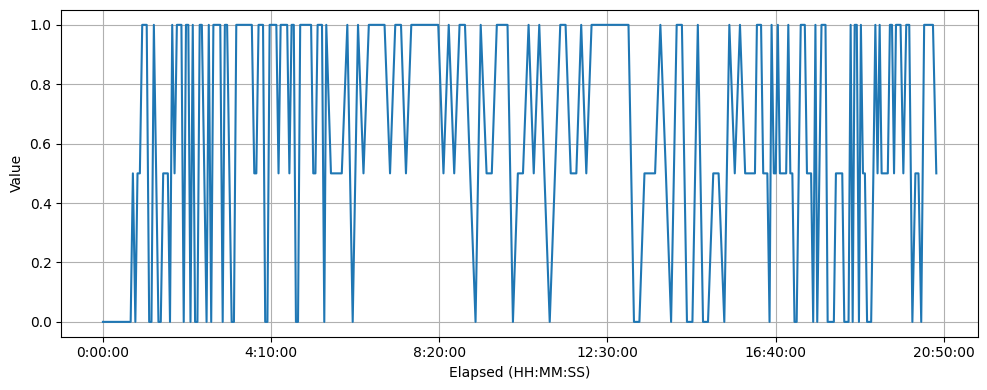

In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

csv_path = Path('data') / 'IL_and_RL_分阶段_固定rule4-run-20260120-171606.csv'
df = pd.read_csv(csv_path)

# 保证数值类型
df['Wall time'] = pd.to_numeric(df['Wall time'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# 以第一个记录为起点，计算经过的秒数
start = df['Wall time'].iloc[0]
df['elapsed_s'] = df['Wall time'] - start

def sec_to_hms(x, pos=None):
    x = int(x)
    h = x // 3600
    m = (x % 3600) // 60
    s = x % 60
    return f"{h:d}:{m:02d}:{s:02d}"

plt.figure(figsize=(10,4))
ax = plt.gca()
ax.plot(df['elapsed_s'], df['Value'], linestyle='-', color='C0')  # 纯线
ax.xaxis.set_major_formatter(FuncFormatter(sec_to_hms))
ax.xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.xlabel('Elapsed (HH:MM:SS)')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()